# Working with Dates

In [2]:
today <- Sys.Date()
today
class(today)
Sys.time()
Sys.timezone()

[1] "2019-02-23"

[1] "Date"

[1] "2019-02-23 13:23:30 -03"

[1] "America/Sao_Paulo"

In [3]:
as.Date("2018-06-28")

[1] "2018-06-28"

In [4]:
as.Date("Jun-28-18", "%b-%d-%y")

[1] "2018-06-28"

In [6]:
format(Sys.Date(), format = "%d %B, %Y")

[1] "23 February, 2019"

In [7]:
format(Sys.Date(), format = "Today is %A")

[1] "Today is Saturday"

In [10]:
date1 <- "Jun 13, '96 hours:23 minutes:01 seconds:45'"
date1_converted <- as.POSIXct(date1, format = "%B %d, '%y hours:%H minutes:%M seconds:%S'")
date1_converted

[1] "1996-06-13 23:01:45 -03"

In [12]:
one_day <- as.Date("2016-06-25", format = "%Y-%m-%d")
one_day
one_day + 1

[1] "2016-06-25"

[1] "2016-06-26"

In [15]:
one_hour <- as.POSIXct("2016-06-05 11:25:123")
one_hour
one_hour + 15

[1] "2016-06-05 11:25:00 -03"

[1] "2016-06-05 11:25:15 -03"

In [16]:
one_day - as.Date(one_hour)

Time difference of 20 days

In [17]:
one_day - one_hour

Warning message in eval(expr, envir, enclos):
“Incompatible methods ("-.Date", "-.POSIXt") for "-"”

[1] "-4009392-06-12"

In [18]:
as.POSIXct(one_day) - one_hour

Time difference of 19.39931 days

In [22]:
dts = c("1127056501", "1127054387", "1123876501", "1821456524", "1127056987", "1127053333" )
mydates = dts

In [23]:
class(mydates) = c("POSIXt", "POSIXct")
mydates

[1] "2005-09-18 12:15:01 -03" "2005-09-18 11:39:47 -03"
[3] "2005-08-12 16:55:01 -03" "2027-09-20 13:08:44 -03"
[5] "2005-09-18 12:23:07 -03" "2005-09-18 11:22:13 -03"

In [21]:
class(mydates)

[1] "POSIXt"  "POSIXct"

In [25]:
mydates = structure(dts, class = c("POSIXt", "POSIXct"))
mydates

[1] "2005-09-18 12:15:01 -03" "2005-09-18 11:39:47 -03"
[3] "2005-08-12 16:55:01 -03" "2027-09-20 13:08:44 -03"
[5] "2005-09-18 12:23:07 -03" "2005-09-18 11:22:13 -03"

In [26]:
b1 = ISOdate(2011, 3, 23)
b1

[1] "2011-03-23 12:00:00 GMT"

In [28]:
b2 = ISOdate(2012, 9, 19)
b2

[1] "2012-09-19 12:00:00 GMT"

In [29]:
b2 - b1

Time difference of 546 days

In [30]:
b1 - b2

Time difference of -546 days

In [31]:
difftime(b2, b1, units = 'weeks')

Time difference of 78 weeks

In [34]:
difftime(b2, b1, units = 'hours')

Time difference of 13104 hours

In [35]:
install.packages('lubridate')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [36]:
require(lubridate)

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [37]:
ymd("20180604")

[1] "2018-06-04"

In [38]:
mdy('06-04-2018')

[1] "2018-06-04"

In [39]:
dmy('04/06/2018')

[1] "2018-06-04"

In [40]:
arrived <- ymd_hms("2016-06-04 12:00:00", tz = 'Pacific/Auckland')
leaves <- ymd_hms("2016-08-10 14:00:00", tz = 'Pacific/Auckland')

In [41]:
arrived
leaves

[1] "2016-06-04 12:00:00 NZST"

[1] "2016-08-10 14:00:00 NZST"

In [42]:
second(arrived)
second(arrived) <- 25
arrived

[1] 0

[1] "2016-06-04 12:00:25 NZST"

In [43]:
wday(arrived)
wday(arrived, label = T)

[1] 7

[1] Sat
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

In [44]:
class(arrived)

[1] "POSIXct" "POSIXt"

In [46]:
inter = interval(arrived, leaves)
inter

[1] 2016-06-04 12:00:25 NZST--2016-08-10 14:00:00 NZST

In [48]:
year(arrived)
week(arrived)
day(arrived)

[1] 2016

[1] 23

[1] 4

In [50]:
sleep <- data.frame(bed.time = ymd_hms("2013-09-01 23:05:24", "2013-09-02 22:51:09", 
                                       "2013-09-04 00:09:16", "2013-09-04 23:43:31", 
                                       "2013-09-06 00:17:41", "2013-09-06 22:42:27", 
                                       "2013-09-08 00:22:27"), 
                    rise.time = ymd_hms("2013-09-02 08:03:29", "2013-09-03 07:34:21", 
                                        "2013-09-04 07:45:06", "2013-09-05 07:07:17", 
                                        "2013-09-06 08:17:13", "2013-09-07 06:52:11", 
                                        "2013-09-08 07:15:19"), 
                    sleep.time = dhours(c(6.74, 7.92, 7.01, 6.23, 6.34, 7.42, 6.45)))

In [53]:
sleep
sleep$efficiency <- round(sleep$sleep.time/(sleep$rise.time - sleep$bed.time) * 100, 1)
sleep

bed.time,rise.time,sleep.time,eficiencia
2013-09-01 23:05:24,2013-09-02 08:03:29,24264s (~6.74 hours),75.2
2013-09-02 22:51:09,2013-09-03 07:34:21,28512s (~7.92 hours),90.8
2013-09-04 00:09:16,2013-09-04 07:45:06,25236s (~7.01 hours),92.3
2013-09-04 23:43:31,2013-09-05 07:07:17,22428s (~6.23 hours),84.2
2013-09-06 00:17:41,2013-09-06 08:17:13,22824s (~6.34 hours),79.3
2013-09-06 22:42:27,2013-09-07 06:52:11,26712s (~7.42 hours),90.9
2013-09-08 00:22:27,2013-09-08 07:15:19,23220s (~6.45 hours),93.7


bed.time,rise.time,sleep.time,eficiencia,efficiency
2013-09-01 23:05:24,2013-09-02 08:03:29,24264s (~6.74 hours),75.2,75.2
2013-09-02 22:51:09,2013-09-03 07:34:21,28512s (~7.92 hours),90.8,90.8
2013-09-04 00:09:16,2013-09-04 07:45:06,25236s (~7.01 hours),92.3,92.3
2013-09-04 23:43:31,2013-09-05 07:07:17,22428s (~6.23 hours),84.2,84.2
2013-09-06 00:17:41,2013-09-06 08:17:13,22824s (~6.34 hours),79.3,79.3
2013-09-06 22:42:27,2013-09-07 06:52:11,26712s (~7.42 hours),90.9,90.9
2013-09-08 00:22:27,2013-09-08 07:15:19,23220s (~6.45 hours),93.7,93.7


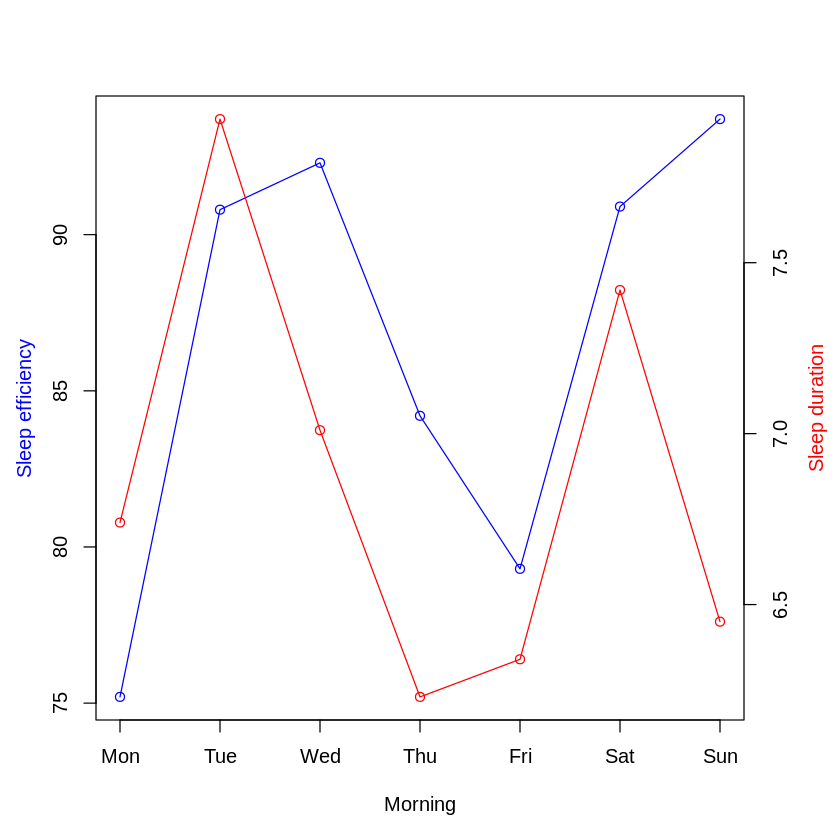

In [55]:
par(mar = c(5, 4, 4, 4))
plot(round_date(sleep$rise.time, "day"), sleep$efficiency, type = "o", col = "blue", xlab = "Morning", ylab = NA)
par(new = TRUE)
plot(round_date(sleep$rise.time, "day"), sleep$sleep.time/3600, type = "o", col = "red", axes = FALSE, ylab = NA, xlab = NA)
axis(side = 4)
mtext(side = 4, line = 2.5, col = "red", "Sleep duration")
mtext(side = 2, line = 2.5, col = "blue", "Sleep efficiency")